<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/mnist_number_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow-gpu==2.0.0-beta1

In [2]:
import matplotlib as mpl
import tensorflow as tf
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:

tf.__version__

'1.15.0'

In [4]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

In [5]:
mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


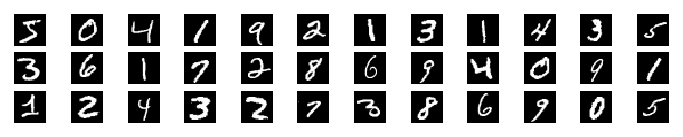

In [6]:

plt.figure(figsize=(6,1))
for i in range(36):
  plt.subplot(3,12,i+1)
  plt.imshow(X_train0[i], cmap="gray")
  plt.axis("off")
plt.show()

In [7]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

#28*28 2차원데이터를 60000개 3차원 데이터 
#uint8 unsigned int 8비트 0~255 

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [8]:
# 데이터를 float 타입으로 변환 후 스케일링함, 이미지를 전처리하는 보편적인 방법
import numpy as np
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

#784 28*28
#/255로 0과 1사이로 나타나짐

(60000, 784) float32


In [9]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical
#원핫인코딩(One-Hot-Encoding)으로 변환
# 1인데 2로 예측했으때 
# 1인데 3으로 예측했을때 틀렸을때 오차가 다르게 계산됨
# 따라서 one-hot-encoding 으로 변환
# softmax activation 쓸때는 y를 one-hot 시켜야한다 
# binary일 경우 굳이 할 필요는 없다.

Y_train = to_categorical(y_train0, 10)
Y_test= to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# epoch 전체 데이터를 몇번 돌건가
# verbose 출력되는 양 0,1,2

np.random.seed(0)

model=Sequential()
model.add(Dense(15,input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error',metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()
# (60000(None 실질적인 차원이아님),15), parameter : weight 개수, 곱해지는 개수 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [13]:
l1=model.layers[0]
l2=model.layers[1]

print(l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params())
print(l2.name, type(l1), l2.output_shape, l2.activation.__name__, l2.count_params())

dense <class 'tensorflow.python.keras.layers.core.Dense'> (None, 15) sigmoid 11775
dense_1 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) sigmoid 160


In [14]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=10, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.0988 - acc: 0.2382 - val_loss: 0.0871 - val_acc: 0.3028
Epoch 2/10
60000/60000 - 1s - loss: 0.0852 - acc: 0.3169 - val_loss: 0.0828 - val_acc: 0.3404
Epoch 3/10
60000/60000 - 1s - loss: 0.0806 - acc: 0.3602 - val_loss: 0.0779 - val_acc: 0.3802
Epoch 4/10
60000/60000 - 1s - loss: 0.0756 - acc: 0.4111 - val_loss: 0.0730 - val_acc: 0.4489
Epoch 5/10
60000/60000 - 1s - loss: 0.0709 - acc: 0.4775 - val_loss: 0.0685 - val_acc: 0.5229
Epoch 6/10
60000/60000 - 1s - loss: 0.0666 - acc: 0.5517 - val_loss: 0.0644 - val_acc: 0.5847
Epoch 7/10
60000/60000 - 1s - loss: 0.0628 - acc: 0.5991 - val_loss: 0.0608 - val_acc: 0.6223
Epoch 8/10
60000/60000 - 1s - loss: 0.0593 - acc: 0.6284 - val_loss: 0.0575 - val_acc: 0.6503
Epoch 9/10
60000/60000 - 1s - loss: 0.0563 - acc: 0.6553 - val_loss: 0.0546 - val_acc: 0.6763
Epoch 10/10
60000/60000 - 1s - loss: 0.0536 - acc: 0.6849 - val_loss: 0.0520 - val_acc: 0.7083
CPU times

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['NanumBarunGothic'] not found. Falling 

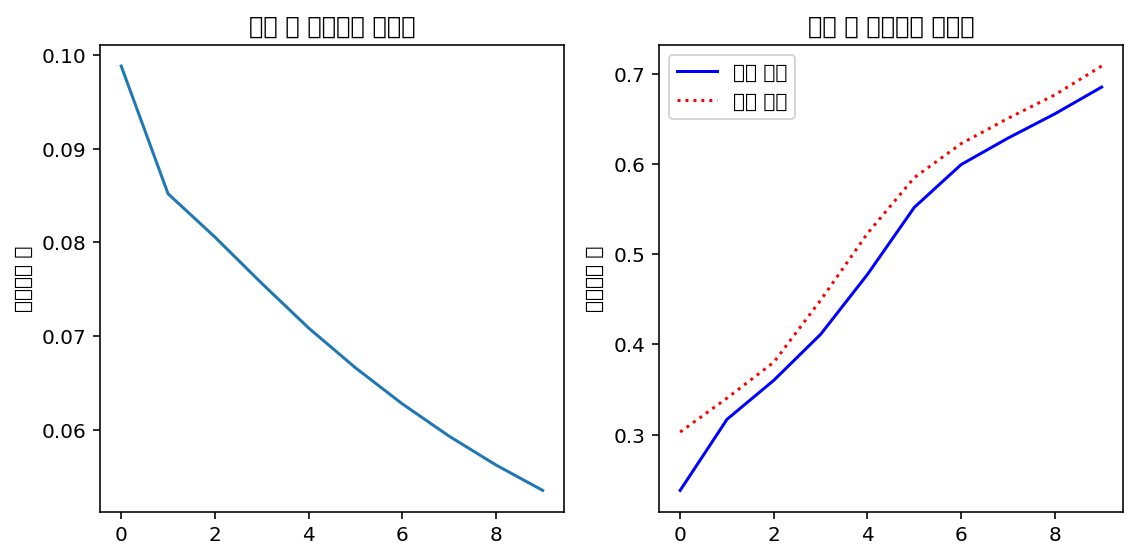

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1,2,2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['acc'],'b-', label="학습 성능")
plt.plot(hist.history['val_acc'],'r:', label="검증 성능")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
w1 = l1.get_weights()
w1[0].shape,w1[1].shape
# None * 784 - 784*15 - 15*10

((784, 15), (15,))

In [17]:
w2 = l2.get_weights()
w2[0].shape, w2[1].shape

((15, 10), (10,))

In [18]:
model.predict(X_test[:1,:])

array([[0.13302222, 0.06916615, 0.05838183, 0.13886318, 0.07440066,
        0.10256258, 0.00654855, 0.78032947, 0.08282901, 0.21232282]],
      dtype=float32)

In [19]:
model.predict_classes(X_test[:1,:],verbose=0)

array([7])

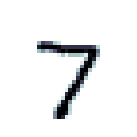

In [20]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

In [21]:
print(model.predict(X_test[:1,:]))

[[0.13302222 0.06916615 0.05838183 0.13886318 0.07440066 0.10256258
  0.00654855 0.78032947 0.08282901 0.21232282]]


In [22]:
print(model.predict_classes(X_test[:1,:],verbose=0))

[7]


In [0]:
#hdf5가 모든 모델에 대해 적용되는 것은 아니다 
model.save('my_model.hdf5')
del model

In [24]:
from tensorflow.keras.models import load_model

model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1,:],verbose=0))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[7]
